# Гафик моей функции 

(6, matplotlib) Напишите функцию, которая отрисовывает функцию на определенном интервале.

Аргументы функции:
- функция для отрисовки `f`,
- начало интервала отрисовки `min_x`,
- конец интервала отрисовки `max_x`,
- количество точек по оси абсцисс `N`,
- ограничение снизу по оси ординат `min_y`,
- ограничение сверху по оси ординат `max_y`
- цвет кривой красный, кривая непрерывная (1).
- логарифмический масштаб по оси ординат (1)
- сетка (1)

Результат сохранить в файл function.jpeg (1). Дополнительно отрисуйте производную функции на том же графике (2). Параметры отрисовки производной по умолчанию.

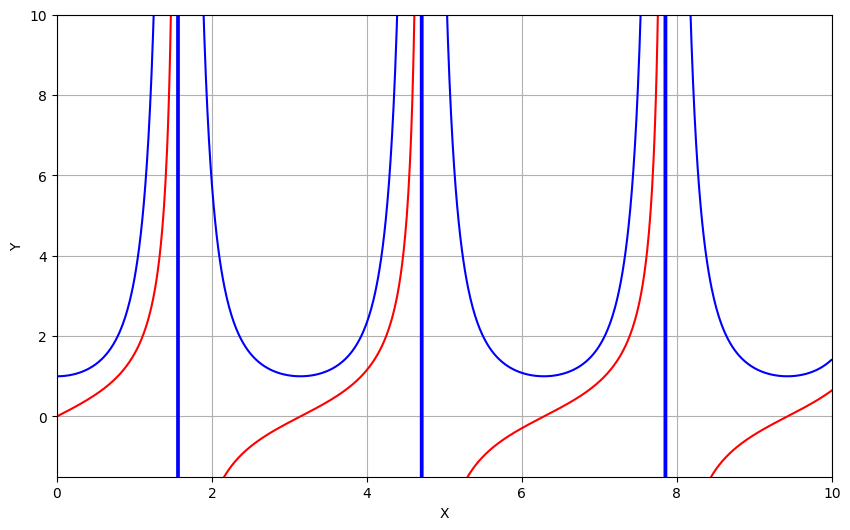

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_function(f, min_x, max_x, N, min_y, max_y, color='red', derivative_color='black', continuous=True, log_scale=False, grid=True):
    x = np.linspace(min_x, max_x, N)
    y = f(x)

    dx = x[1] - x[0]
    dy = np.gradient(y, dx)

    plt.figure(figsize=(10, 6))
    if log_scale:
        plt.yscale('log')
        y = np.clip(y, a_min=1e-10, a_max=None)  
    if continuous:
        plt.plot(x, y, color=color, label='Функция')
        plt.plot(x, dy, color=derivative_color, label='Производная')
    else:
        plt.scatter(x, y, color=color)
        plt.scatter(x, dy, color=derivative_color)

    plt.xlim(min_x, max_x)
    plt.ylim(min_y, max_y)
    if grid:
        plt.grid()
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.savefig("function.jpeg")
    plt.show()

def example_function(x):
    return np.tan(x)
plot_function(example_function, 0, 10, 1000, -1.5, 10, color='red', derivative_color='blue', continuous=True, log_scale=False, grid=True)

# Гистограмма моих данных

(6, numpy/matplotlib) Функция на вход принимает три параметра:

- массив случайных пар `(x, y)` чисел `data`,
- точки разбиения оси абсцисс `x`,
- точки разбиения оси ординат `y`,
- пороговое значение `threshold`

Требования
- Постройте одномерную гистограмму распределения данных (требуется изменить размер входного массива `data` до одномерного) (1.5)
- Сохраните в `histograms_0.png` (0.5).
- Постройте двумерную гистограмму распределения данных при условии: если в корзине (бине/ячейке гистограммы) значение меньше `treshold`, то требуется выставить 0, иначе -- 1 (1.5).
- Сохраните в `histograms_1.png` (0.5).
- Постройте двумерную гистограмму распределения данных при условии: если в корзине (бине/ячейке гистограммы) значение больше `treshold`, то требуется выставить 0, иначе -- значение, которое было в гистограмме (1.5).
- Сохраните в `histograms_2.png` (0.5).
- Не забудьте выставить colorbar (1).

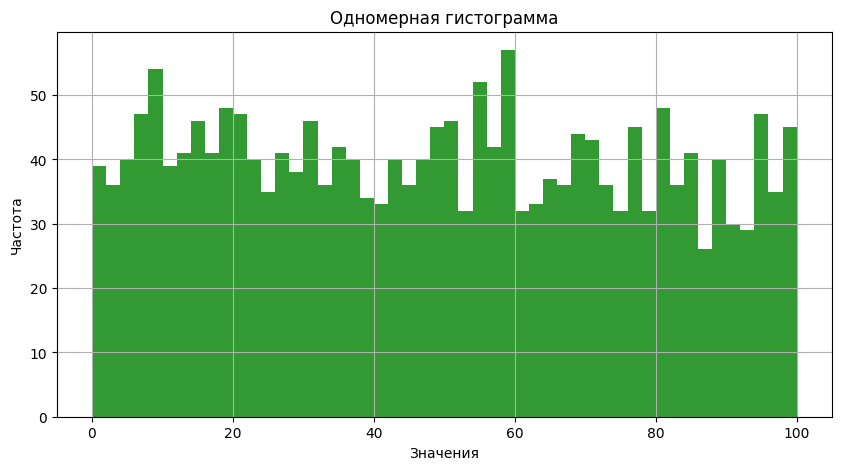

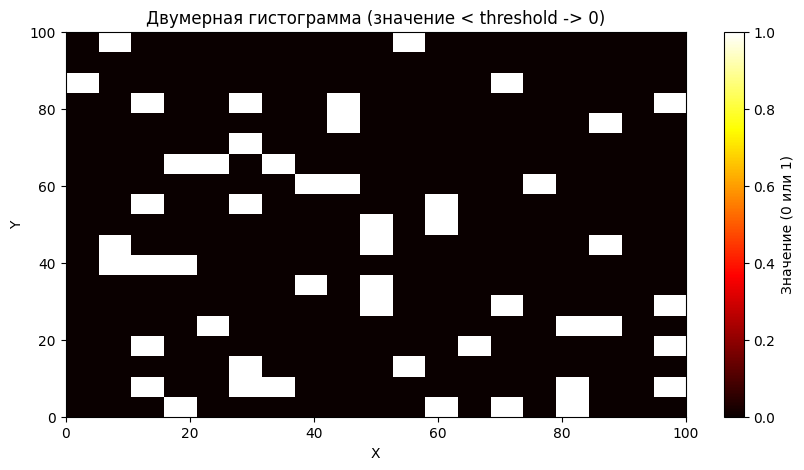

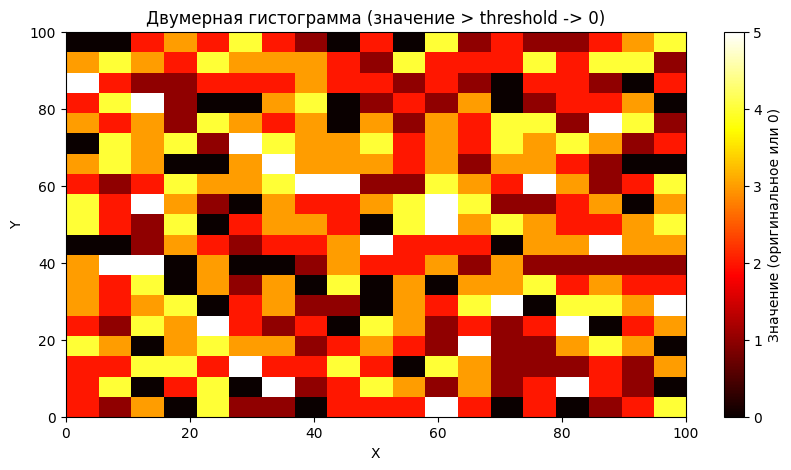

In [ ]:
def plot_histograms(data, x_bins, y_bins, threshold):
    data_flat = data.flatten()

    plt.figure(figsize=(10, 5))
    plt.hist(data_flat, bins=50, color='green', alpha=0.8)
    plt.title('Одномерная гистограмма')
    plt.xlabel('Значения')
    plt.ylabel('Частота')
    plt.grid()
    plt.savefig('histograms_0.png')
    plt.show()

    hist_2d = np.histogram2d(data[:, 0], data[:, 1], bins=[x_bins, y_bins])[0]
    hist_2d_conditioned_1 = np.where(hist_2d < threshold, 0, 1)
    plt.figure(figsize=(10, 5))
    plt.imshow(hist_2d_conditioned_1.T, origin='lower', cmap='hot', 
               extent=[x_bins[0], x_bins[-1], y_bins[0], y_bins[-1]], aspect='auto')
    plt.colorbar(label='Значение')
    plt.title('Двумерная гистограмма (значение < threshold -> 0)')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.savefig('histograms_1.png')
    plt.show()

    hist_2d_cond_2 = np.where(hist_2d > threshold, 0, hist_2d)
    plt.figure(figsize=(10, 5))
    plt.imshow(hist_2d_cond_2.T, origin='lower', cmap='hot', 
               extent=[x_bins[0], x_bins[-1], y_bins[0], y_bins[-1]], aspect='auto')
    plt.colorbar(label='Значение')
    plt.title('Двумерная гистограмма (значение > threshold -> 0)')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.savefig('histograms_2.png')
    plt.show()

np.random.seed(100)
data = np.random.rand(1000, 2) * 100 
x_bins = np.linspace(0, 100, 20) 
y_bins = np.linspace(0, 100, 20)
threshold = 5
plot_histograms(data, x_bins, y_bins, threshold)


# ~Кино~Игрокритик

Время стать критиком игр (`video-games.csv`). Требуется создать словарь (ключ словаря указан вначале пункта) с соответствующим значением из пункта (тип значения указан в конце строки).

- (1) `"n_games"` Найдите полное количество игр в таблице `int`
- (2) `"by_years"` Определите количество игр за каждый год `pd.DataFrame`
- (2) `"mean_price"` Посчитайте среднюю цену игр, где создатель (`"publisher"`) EA `pd.DataFrame`
- (2) `"age_max_price"` Найдите самые дорогие игры среди игр с разным возрастным рейтингом (`"age_rating"`) `pd.DataFrame`
- (2) `"mean_raiting_1_2"` Найдите средний рейтинг игр, где количество игроков (`"max_players"`) 1 или 2 `float`
- (2) `"min_max_price"` Найдите максимальную и минимальную цену (`"price"`) игр с разным возрастным рейтингом (`"age_rating"`) и среднее значение метрики продаж (`"sales_metric"`). Отсортируйте по убыванию максимальной
цены `pd.DataFrame`
- (2) `"n_games_by_age"` Найдите количество игр в группах с разным рейтингом (`"review_raiting"`) `pd.DataFrame`
- (2) `"same_price_raiting"` Найти игры, у которых совпадает цена (`"price"`) с точностью до округления вниз и совпадает рейтинг (`"review_raiting"`) с точностью до десятков `pd.DataFrame`
- (3) `"creators"` Определите всех возможных создателей игр (`"publisher"`). В ответе не может быть коллабораций создателей `list`
- (4) "max_raiting_by_years" Для каждого года (`"year"`) определите игры (вывести название (`"title"`) в отдельном столбце) с максимальным пользовательским рейтингом (`"review_raiting"`) `pd.DataFrame`
- (1) "empty_creators" Найдите количество игр, у которых отсутствует создатель (`"publisher"`) `int` Ответом является словарь.

In [39]:
import pandas as pd

df = pd.read_csv('video-games.csv')
results = {}
results["n_games"] = df.shape[0]

results["by_years"] = df['year'].value_counts().reset_index(name='count').rename(columns={'index': 'year'})
results["mean_price"] = df[df['publisher'] == 'EA']['price'].mean()
results["age_max_price"] = df.loc[df.groupby('age_raiting')['price'].idxmax()][['age_raiting', 'title', 'price']]
results["mean_raiting_1_2"] = df[df['max_players'].isin([1, 2])]['review_raiting'].mean()

results["min_max_price"] = df.groupby('age_raiting').agg(
    min_price=('price', 'min'),
    max_price=('price', 'max'),
    mean_sales_metric=('sales_metric', 'mean')
).reset_index().sort_values(by='max_price', ascending=False)

results["n_games_by_age"] = df['review_raiting'].value_counts().reset_index(name='count').rename(columns={'index': 'review_raiting'})

df['rounded_price'] = df['price'].apply(lambda x: int(x))
df['rounded_rating'] = df['review_raiting'].apply(lambda x: round(x, 1))
results["same_price_raiting"] = df.groupby(['rounded_price', 'rounded_rating']).filter(lambda x: len(x) > 1)[['title', 'rounded_price', 'rounded_rating']]

results["creators"] = df['publisher'].unique().tolist()

results["max_raiting_by_years"] = df.loc[df.groupby('year')['review_raiting'].idxmax()][['year', 'title', 'review_raiting']]

results["empty_creators"] = df['publisher'].isnull().sum()

for key, value in results.items():
    print(f"{key}: {value}")


n_games: 1212
by_years:    year  count
0  2007    414
1  2008    379
2  2006    263
3  2005    134
4  2004     22
mean_price: 15.477272727272727
age_max_price:     age_raiting                                   title  price
730           E      Bladestorm: The Hundred Years' War  44.95
161           M  The Legend of Zelda: Twilight Princess  39.95
427           T        Guitar Hero III: Legends of Rock  49.95
mean_raiting_1_2: 68.56292682926829
min_max_price:   age_raiting  min_price  max_price  mean_sales_metric
2           T       4.95      49.95           0.538702
0           E       4.95      44.95           0.543788
1           M       4.95      39.95           0.357131
n_games_by_age:     review_raiting  count
0               72     47
1               75     45
2               73     42
3               80     42
4               70     39
..             ...    ...
66              97      1
67              41      1
68              19      1
69              33      1
70             